<a href="https://colab.research.google.com/github/GyanendraChaubey/Explainable-AI-Explaining-Black-box-of-Machine-Learning-Models-in-Thyroid-Disease-Prediction/blob/main/XAI_ThyroidDiseasePrediction_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing SHAP Explainar



In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 13.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491624 sha256=b6fbcf3c45e3fcb789d9de6a64a4467a46be2409850c8cb9040a13b584eea77a
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap

Importing Necessary Libraries 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

Loading Data

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/T3resin1.txt')

Making copy data

In [ ]:
data=data.copy()

Understanding Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Class                                    215 non-null    int64  
 1   T3-resin uptake test                     215 non-null    int64  
 2   Total Serum thyroxin                     215 non-null    float64
 3   Total serum triiodothyronine             215 non-null    float64
 4   basal thyroid-stimulating hormone (TSH)  215 non-null    float64
 5   Maximal absolute difference of TSH       215 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 10.2 KB


In [ ]:
data.shape

(215, 6)

In [ ]:
data.size

1290

In [ ]:
data.describe()

,Class,T3-resin uptake test,Total Serum thyroxin,Total serum triiodothyronine,basal thyroid-stimulating hormone (TSH),Maximal absolute difference of TSH
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.693023,109.595349,9.804651,2.050233,2.880000,4.199070
std,0.462316,13.145447,4.697362,1.419486,6.118031,8.070519
min,0.000000,65.000000,0.500000,0.200000,0.100000,-0.700000
25%,0.000000,103.000000,7.100000,1.350000,1.000000,0.550000
50%,1.000000,110.000000,9.200000,1.700000,1.300000,2.000000
75%,1.000000,117.500000,11.300000,2.200000,1.700000,4.100000
max,1.000000,144.000000,25.300000,10.000000,56.400000,56.300000


In [ ]:
data.isnull().sum()

Class                                      0
T3-resin uptake test                       0
Total Serum thyroxin                       0
Total serum triiodothyronine               0
basal thyroid-stimulating hormone (TSH)    0
Maximal absolute difference of TSH         0
dtype: int64

In [ ]:
data.head()

,Class,T3-resin uptake test,Total Serum thyroxin,Total serum triiodothyronine,basal thyroid-stimulating hormone (TSH),Maximal absolute difference of TSH
0,1,107,10.1,2.2,0.9,2.7
1,1,113,9.9,3.1,2.0,5.9
2,1,127,12.9,2.4,1.4,0.6
3,1,109,5.3,1.6,1.4,1.5
4,1,105,7.3,1.5,1.5,-0.1


Exploratory data Analysis

In [ ]:
data.columns

Index(['Class', 'T3-resin uptake test', 'Total Serum thyroxin',
       'Total serum triiodothyronine',
       'basal thyroid-stimulating hormone (TSH)',
       'Maximal absolute difference of TSH'],
      dtype='object')

In [ ]:
data.drop_duplicates(keep='first',inplace=True)

In [ ]:
data.shape

(215, 6)

In [ ]:
import seaborn as sns

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


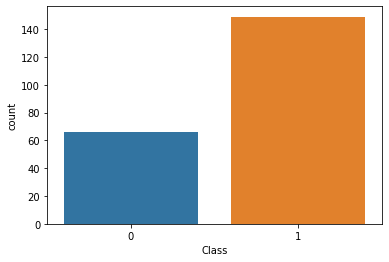

In [ ]:
sns.countplot(data['Class'])

In [ ]:
data['Class'].value_counts()

1    149
0     66
Name: Class, dtype: int64

In [ ]:
data.corr()

,Class,T3-resin uptake test,Total Serum thyroxin,Total serum triiodothyronine,basal thyroid-stimulating hormone (TSH),Maximal absolute difference of TSH
Class,1.000000,0.111716,-0.190631,-0.334558,-0.384972,-0.312427
T3-resin uptake test,0.111716,1.000000,-0.494162,-0.536971,0.290368,0.296327
Total Serum thyroxin,-0.190631,-0.494162,1.000000,0.718682,-0.422845,-0.409965
Total serum triiodothyronine,-0.334558,-0.536971,0.718682,1.000000,-0.241641,-0.227392
basal thyroid-stimulating hormone (TSH),-0.384972,0.290368,-0.422845,-0.241641,1.000000,0.497545
Maximal absolute difference of TSH,-0.312427,0.296327,-0.409965,-0.227392,0.497545,1.000000


Separating features and target variable 

In [ ]:
y=data['Class']
x=data.drop(columns='Class')

Splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

Creating Object of model

In [ ]:
model=LogisticRegression()

Fitting the model

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Checking the accuracy of model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
y_pred=model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(" Testing Accuracy: %.2f%%" % (accuracy * 100.0))
scores = cross_val_score(model, x_train, y_train, cv=10)
print("Cross Validation Accuracy: %.2f%% " % (scores.mean()*100))

 Testing Accuracy: 90.77%
Cross Validation Accuracy: 87.33% 


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Logistic Regression Classifier')

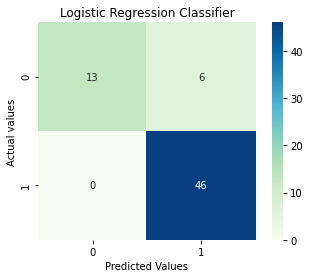

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
ax.set_title('Logistic Regression Classifier')

In [ ]:
from sklearn.metrics import classification_report
print('Logistic Regression Classifier')
print(classification_report(y_test, y_pred))

Logistic Regression Classifier
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        19
           1       0.88      1.00      0.94        46

    accuracy                           0.91        65
   macro avg       0.94      0.84      0.88        65
weighted avg       0.92      0.91      0.90        65



XAI: SHAP to explain the *model*

---

SHAP: Shapely Additive Explanations

---


Generate Linear Explainer and SHAP values

In [ ]:
explainer=shap.LinearExplainer(model,x)
shap_values = explainer.shap_values(x)
expected_value = explainer.expected_value

---

*********Visualisations*********

---

Summarize the effect of all features

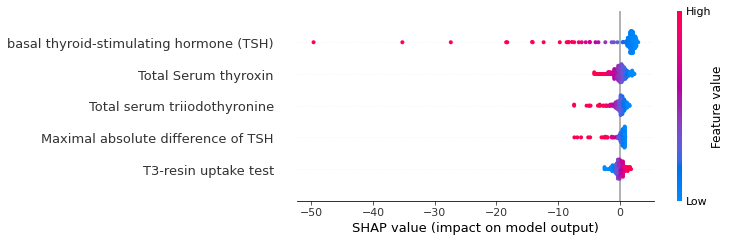

In [ ]:
shap.summary_plot(shap_values, x,title="SHAP summary plot") 

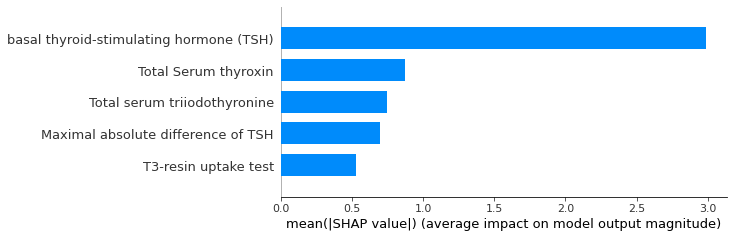

In [ ]:
# Generate summary bar plot 
shap.summary_plot(shap_values, x,plot_type="bar") 

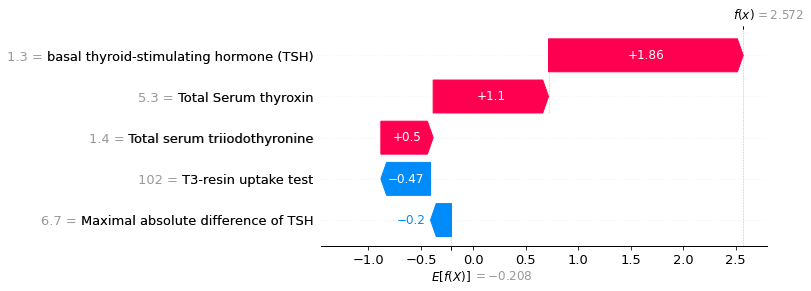

In [ ]:
# Generate waterfall plot  
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[214], features=x.loc[214,:], feature_names=x.columns, max_display=5, show=True)

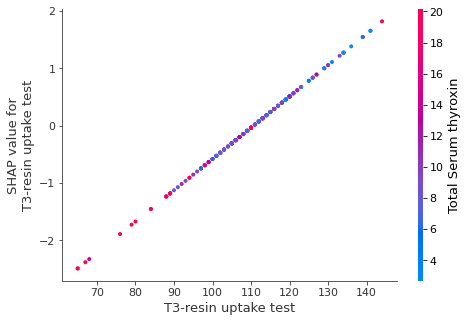

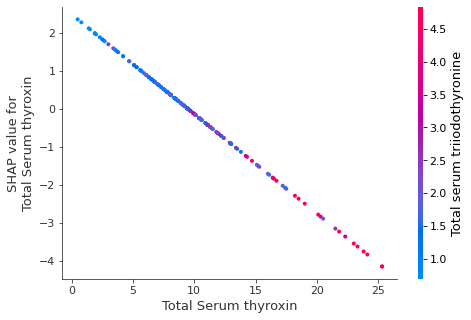

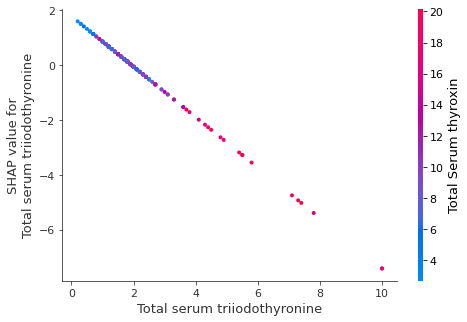

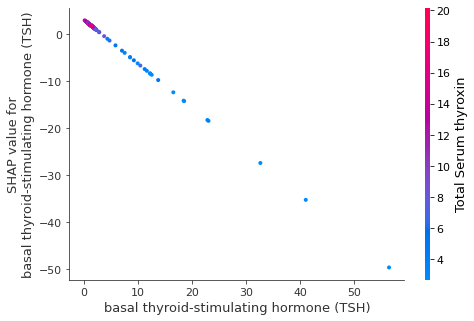

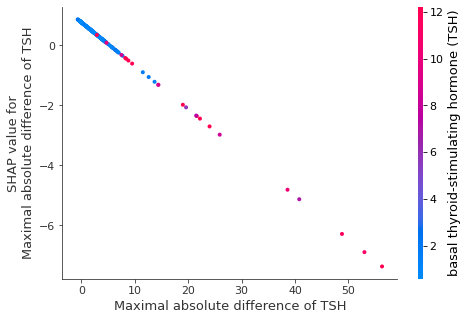

In [ ]:
# Generate multiple dependence plots
for name in x_train.columns:
     shap.dependence_plot(name, shap_values, x)


In [ ]:
# Generate force plot - Multiple rows
shap.initjs() 
shap.force_plot(explainer.expected_value, shap_values[:50,:], x.iloc[:50,:],link='logit')

In [ ]:
# Generate force plot - Single for class 0
shap.initjs()
abs=170
y_pred=model.predict(x)
print("The prediction is: ",y_pred[abs])
shap.force_plot(explainer.expected_value, shap_values[abs,:], x.iloc[abs,:],link='logit')

The prediction is:  0


In [ ]:
# Generate force plot - Single for class 1
shap.initjs()
abs=214
y_pred=model.predict(x)
print("The prediction is: ",y_pred[abs])
shap.force_plot(explainer.expected_value, shap_values[abs,:], x.iloc[abs,:],link='logit')

The prediction is:  1


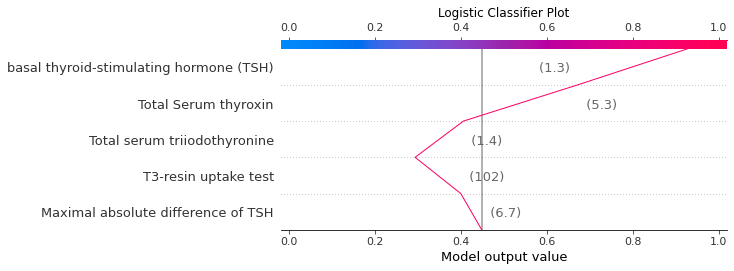

In [ ]:
# Generate Decision plot 
shap.decision_plot(expected_value, shap_values[214], link='logit',features=x.iloc[214,:], feature_names=(x.columns.tolist()),show=True,title="Logistic Classifier Plot")

In [ ]:
shap_values[214]

array([-0.47321181,  1.09948983,  0.49861624,  1.85553412, -0.20018542])

In [ ]:
expected_value

-0.2082422581405743

In [ ]:
x.iloc[214]

T3-resin uptake test                       102.0
Total Serum thyroxin                         5.3
Total serum triiodothyronine                 1.4
basal thyroid-stimulating hormone (TSH)      1.3
Maximal absolute difference of TSH           6.7
Name: 214, dtype: float64

In [ ]:
model.coef_[0]

array([ 0.05451749, -0.26272158, -0.91995617, -0.93477789, -0.14453821])

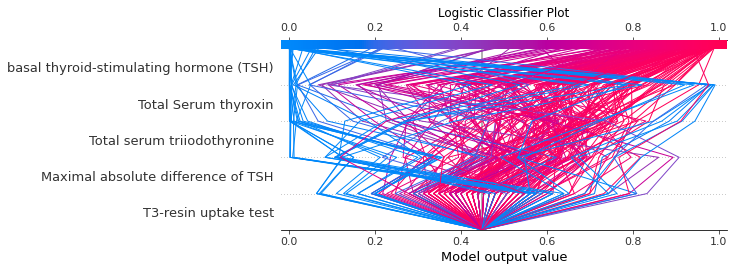

In [ ]:
# Generate Decision plot 
shap.decision_plot(expected_value, shap_values[:214], link='logit',features=x.iloc[:214,:], feature_names=(x.columns.tolist()),show=True,title="Logistic Classifier Plot",return_objects=True)

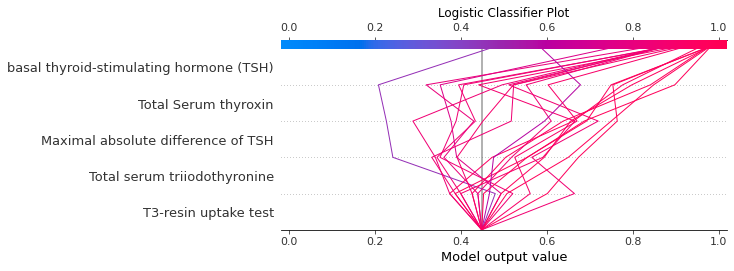

In [ ]:
# Generate Decision plot 
shap.decision_plot(expected_value, shap_values[:20], link='logit',features=x.iloc[:20,:], feature_names=(x.columns.tolist()),show=True,title="Logistic Classifier Plot",return_objects=True)

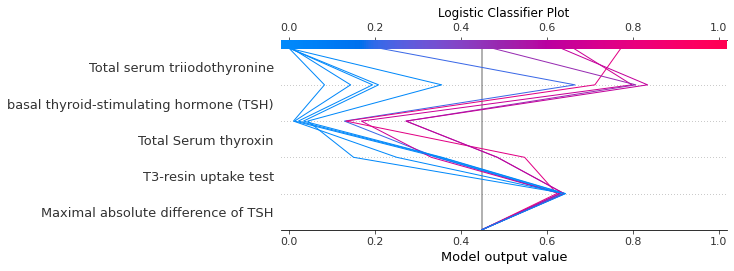

In [ ]:
# Generate Decision plot 
shap.decision_plot(expected_value, shap_values[160:170], link='logit',features=x.iloc[160:170,:], feature_names=(x.columns.tolist()),show=True,title="Logistic Classifier Plot",return_objects=True)

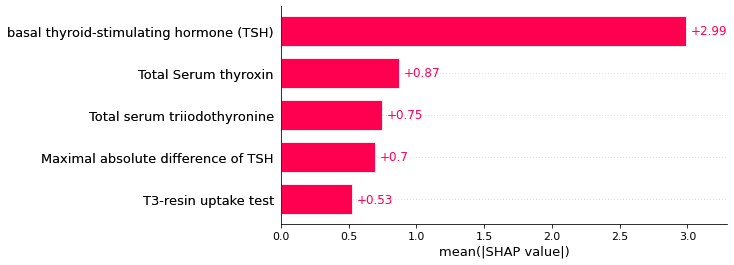

In [ ]:
shapvalues=explainer(x)
shap.plots.bar(shapvalues)

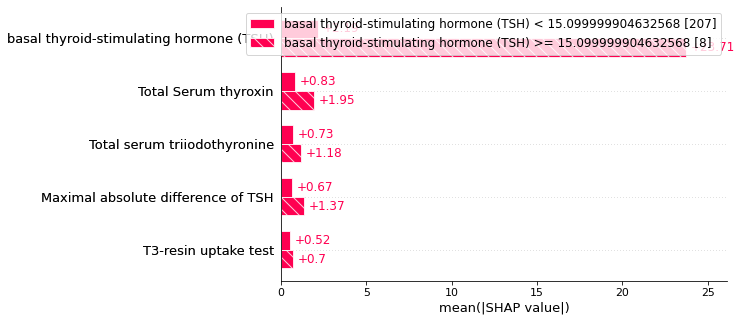

In [ ]:
shap.plots.bar(shapvalues.cohorts(2).abs.mean(0))

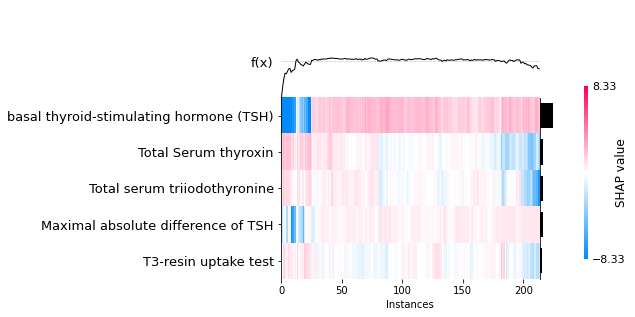

In [ ]:
shap.plots.heatmap(shapvalues[:214])

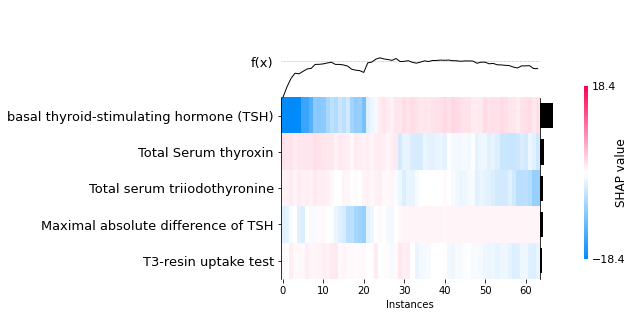

In [ ]:
shap.plots.heatmap(shapvalues[150:214])

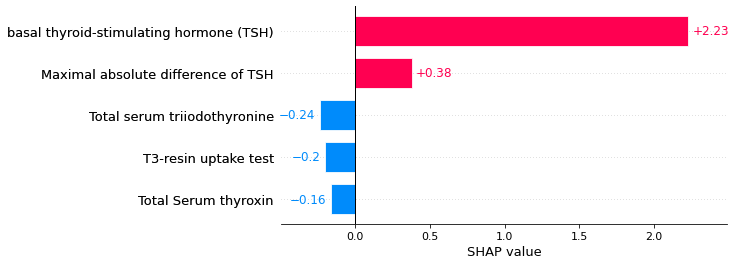

In [ ]:
shap.plots.bar(shapvalues[0])

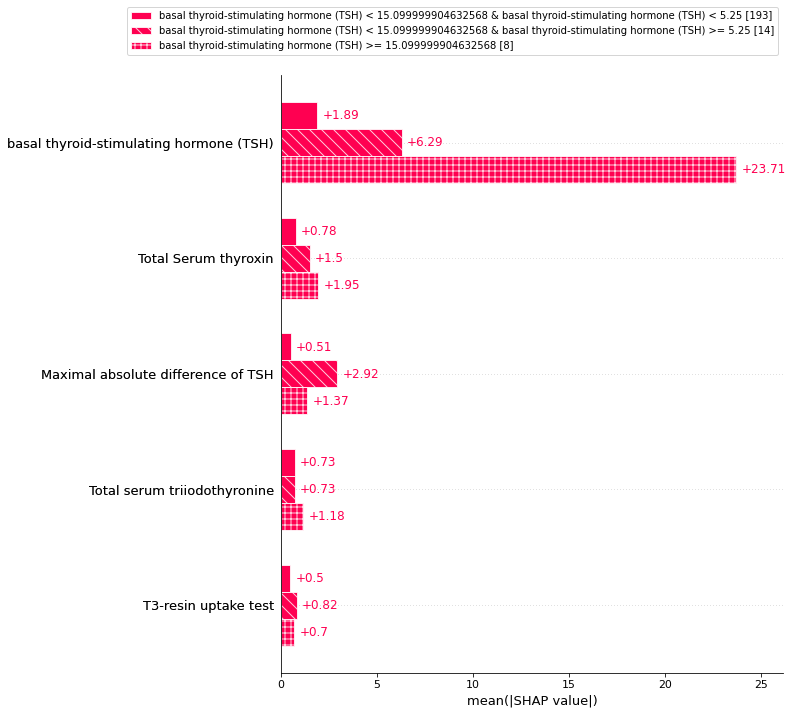

In [ ]:
shap.plots.bar(shapvalues.cohorts(3).abs.mean(0),
               show=False)
fig = plt.gcf() # gcf means "get current figure"
fig.set_figheight(11)
fig.set_figwidth(9)
#plt.rcParams['font.size'] = '12'
ax = plt.gca() #gca means "get current axes"
leg = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102))
for l in leg.get_texts(): l.set_text(l.get_text().replace('Class', 'Klasse'))
plt.show()
fig.savefig('thyroid')

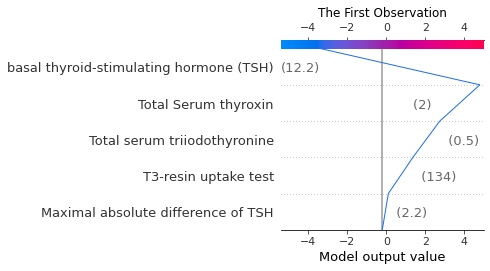

The Second Observation


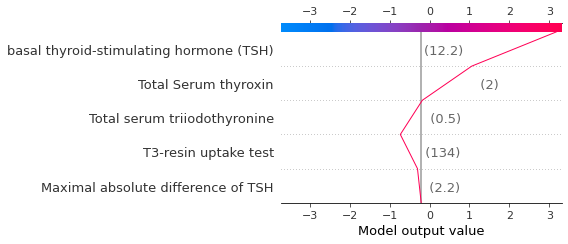

In [ ]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
shap_values = explainer.shap_values(x_test)[0]
shap.decision_plot(expected_value, shap_values, x_test, show=False)
ax1.title.set_text('The First Observation')
plt.show()
print("The Second Observation")
ax2 = fig.add_subplot(122)
shap_values = explainer.shap_values(x_test)[1]
shap.decision_plot(expected_value, shap_values, x_test, show=False)
ax2.title.set_text('The Second Observation')
plt.tight_layout()
plt.show()